# Project Title : Prediction-of-Calories-Burnt using Machine Learning 
## Quantitative
## A quantitative variable is a variable that reflects a notion of magnitude, that is, if the values it can take are numbers. A quantitative variable represents thus a measure and is numerical.

## Quantitative variables are divided into two types: discrete and continuous. The difference is explained in the following two sections.

## Discrete
## Quantitative discrete variables are variables for which the values it can take are countable and have a finite number of possibilities. The values are often (but not always) integers. Here are some examples of discrete variables:

## Continuous
## On the other hand, quantitative continuous variables are variables for which the values are not countable and have an infinite number of possibilities. For example: Age,Weight,Height  

## Qualitative
## In opposition to quantitative variables, qualitative variables (also referred as categorical variables or factors in R) are variables that are not numerical and which values fits into categories.

## In other words, a qualitative variable is a variable which takes as its values modalities, categories or even levels, in contrast to quantitative variables which measure a quantity on each individual.

## Qualitative variables are divided into two types: nominal and ordinal.
## Nominal
## A qualitative nominal variable is a qualitative variable where no ordering is possible or implied in the levels.

## For example, the variable gender is nominal because there is no order in the levels (no matter how many levels you consider for the gender—only two with female/male, or more than two with female/male/ungendered/others, levels are unordered). Eye color is another example of a nominal variable because there is no order among blue, brown or green eyes.

## Ordinal
## On the other hand, a qualitative ordinal variable is a qualitative variable with an order implied in the levels. For instance, if the severity of road accidents has been measured on a scale such as light, moderate and fatal accidents, this variable is a qualitative ordinal variable because there is a clear order in the levels.

## Another good example is health, which can take values such as poor, reasonable, good, or excellent. Again, there is a clear order in these levels so health is in this case a qualitative ordinal variable

## Nominal : 
1. batsman
2. team
3. out_by
4. city
5. date_of_match
6. venue
7. result
8. result_margin
9. eliminator
10. Umpire 1 
11. Umpire 2
12. Bowler
13. Team
14. out_by
15. Home_team
16. Away_team

## Ordinal :
17. toss_winner
18. winner
19. man_of_match

## DISCRETE: 
20. match_no
21. Run
22. Ball
23. 4s
24. 6s
25. Home_team_run
26. Home_team_wickets
27. Away_team_run
28. Home_team_run
29. Home_team_wickets
30. Home_team
31. Away_team
32. Run
33. Ball
34. 4s
35. 6s

## Continuoue
36. Home_team_over
37. Away_team_over

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
from sklearn.tree import DecisionTreeRegressor

In [10]:
from sklearn.ensemble import RandomForestRegressor

In [11]:
from sklearn.metrics import r2_score,classification_report 

In [12]:
import xgboost as xgb

In [14]:
calories_df=pd.read_csv('calories.csv')


In [15]:
calories_df

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0
...,...,...
14995,15644082,45.0
14996,17212577,23.0
14997,17271188,75.0
14998,18643037,11.0


In [16]:
exercise_df=pd.read_csv('exercise.csv')

In [17]:
exercise_df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3


In [18]:
df=exercise_df.merge(calories_df,how="inner")


In [19]:
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [20]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.1+ MB


In [22]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height'>

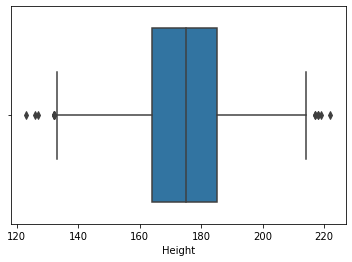

In [23]:
sns.boxplot(df['Height'])

In [24]:
q1=df['Height'].quantile(0.25)

In [25]:
q3=df['Height'].quantile(0.75)

In [26]:
IQR=q3-q1

In [27]:
lower=q1-1.5*IQR

In [28]:
higher=q3+1.5*IQR

In [29]:
df=df[(df['Height']>lower) & (df['Height']<higher)]

In [30]:
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Heart_Rate'>

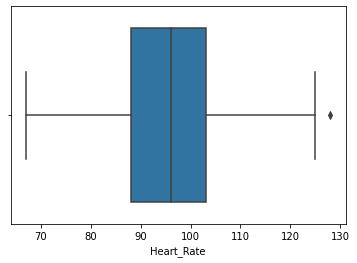

In [31]:
sns.boxplot(df['Heart_Rate'])

In [32]:
q1=df['Heart_Rate'].quantile(0.25)

In [33]:
q3=df['Heart_Rate'].quantile(0.75)

In [34]:
IQR=q3-q1

In [35]:
lower=q1-1.5*IQR

In [36]:
higher=q3+1.5*IQR

In [37]:
df=df[(df['Heart_Rate']>lower) & (df['Heart_Rate']<higher)]

In [38]:
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight'>

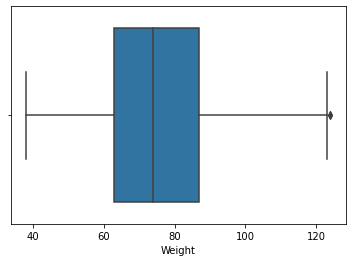

In [39]:
sns.boxplot(df['Weight'])

In [40]:
q1=df['Weight'].quantile(0.25)

In [41]:
q3=df['Weight'].quantile(0.75)

In [42]:
IQR=q3-q1

In [43]:
lower=q1-1.5*IQR

In [44]:
higher=q3+1.5*IQR

In [45]:
df=df[(df['Weight']>lower) & (df['Weight']<higher)]

In [46]:
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Duration'>

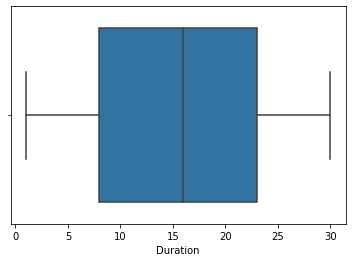

In [47]:
sns.boxplot(df['Duration'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Body_Temp'>

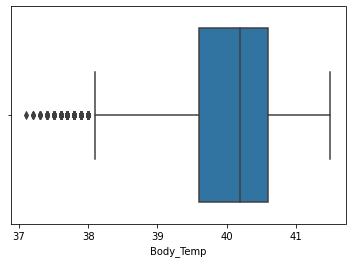

In [48]:
sns.boxplot(df['Body_Temp'])

In [49]:
q1=df['Body_Temp'].quantile(0.25)

In [50]:
q3=df['Body_Temp'].quantile(0.75)

In [51]:
IQR=q3-q1

In [52]:
lower=q1-1.5*IQR

In [53]:
higher=q3+1.5*IQR

In [54]:
df=df[(df['Body_Temp']>lower) & (df['Body_Temp']<higher)]

In [55]:
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

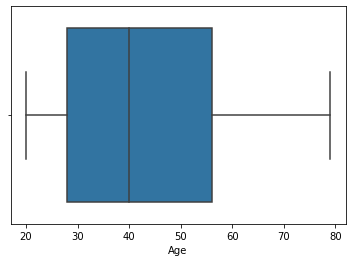

In [56]:
sns.boxplot(df['Age'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='User_ID'>

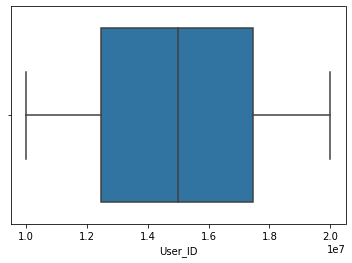

In [57]:
sns.boxplot(df['User_ID'])

In [58]:
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

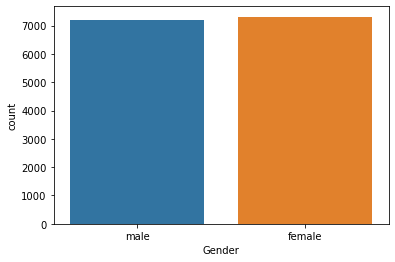

In [59]:
sns.countplot(df['Gender'])

<AxesSubplot:xlabel='Gender', ylabel='Duration'>

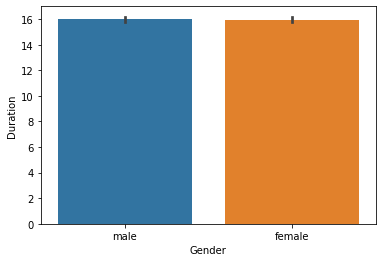

In [60]:
sns.barplot(x=df['Gender'],y=df['Duration'])

<AxesSubplot:xlabel='Gender', ylabel='Heart_Rate'>

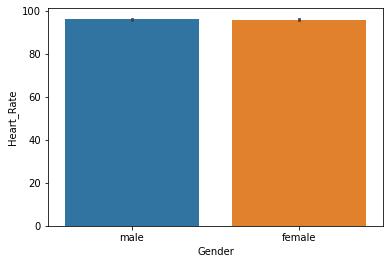

In [61]:
sns.barplot(x=df['Gender'],y=df['Heart_Rate'])

<AxesSubplot:xlabel='Gender', ylabel='Body_Temp'>

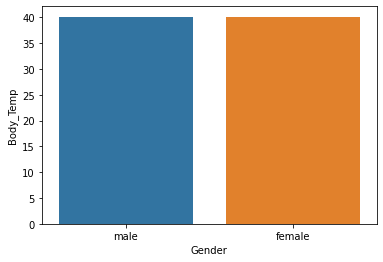

In [62]:
sns.barplot(x=df['Gender'],y=df['Body_Temp'])

<AxesSubplot:xlabel='Gender', ylabel='Body_Temp'>

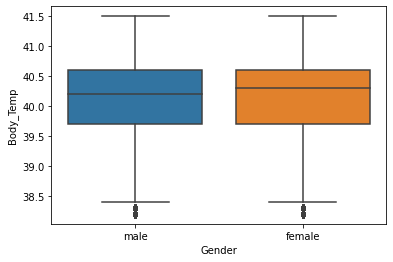

In [63]:
sns.boxplot(x=df['Gender'],y=df['Body_Temp'])

<AxesSubplot:xlabel='Gender', ylabel='Heart_Rate'>

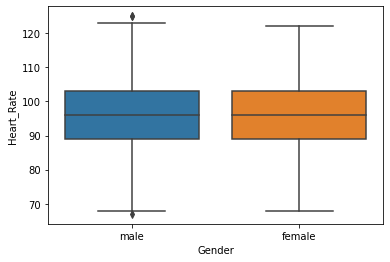

In [64]:
sns.boxplot(x=df['Gender'],y=df['Heart_Rate'])

<AxesSubplot:xlabel='Gender', ylabel='Duration'>

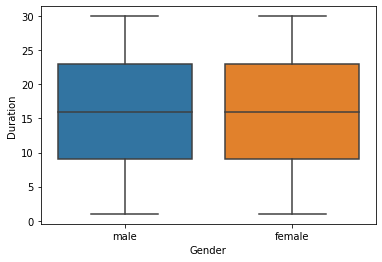

In [65]:
sns.boxplot(x=df['Gender'],y=df['Duration'])

<AxesSubplot:xlabel='Gender', ylabel='Height'>

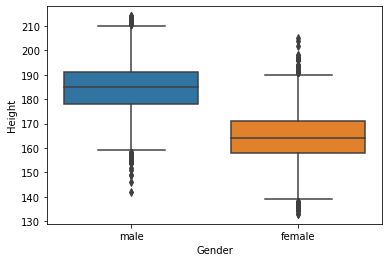

In [66]:
sns.boxplot(x=df['Gender'],y=df['Height'])

<AxesSubplot:xlabel='Gender', ylabel='Weight'>

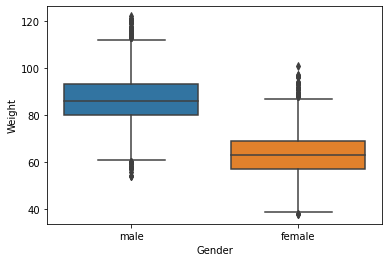

In [67]:
sns.boxplot(x=df['Gender'],y=df['Weight'])

<AxesSubplot:xlabel='Gender', ylabel='Calories'>

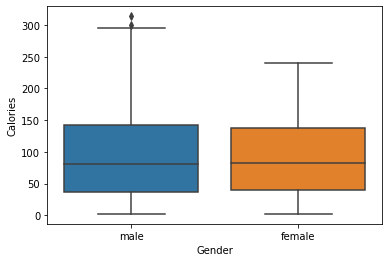

In [68]:
sns.boxplot(x=df['Gender'],y=df['Calories'])

In [69]:
label_df=df.groupby(['Gender','Age','Height','Weight'])['Calories'].mean().sort_values(ascending=False).index


In [70]:
val_df=df.groupby(['Gender','Age','Height','Weight'])['Calories'].mean().sort_values(ascending=False).values


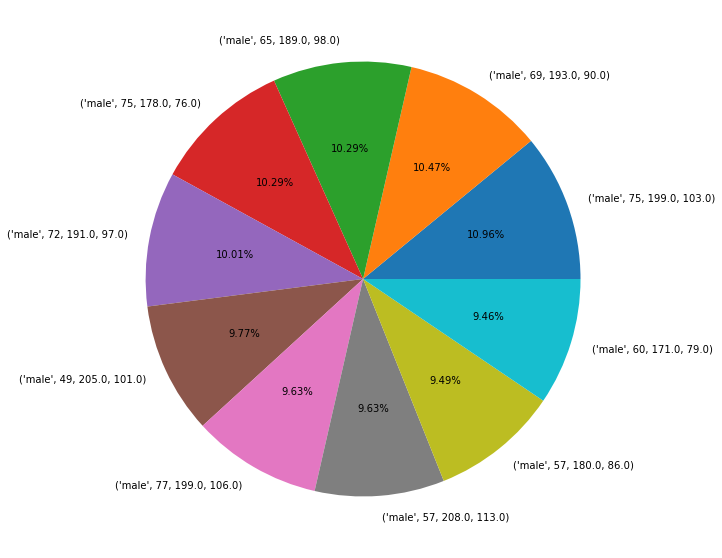

In [71]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df[:10],labels=label_df[:10],autopct="%1.2f%%")
plt.show()

In [72]:
label_df=df.groupby(['Gender','Age','Height','Weight'])['Body_Temp'].mean().sort_values(ascending=False).index


In [73]:
val_df=df.groupby(['Gender','Age','Height','Weight'])['Body_Temp'].mean().sort_values(ascending=False).values


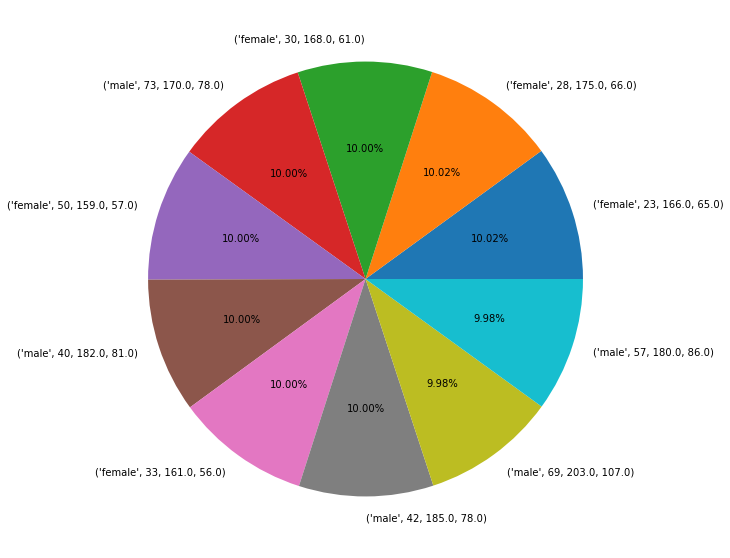

In [74]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df[:10],labels=label_df[:10],autopct="%1.2f%%")
plt.show()

In [75]:
label_df=df.groupby(['Gender','Age','Height','Weight'])['Heart_Rate'].mean().sort_values(ascending=False).index


In [76]:
val_df=df.groupby(['Gender','Age','Height','Weight'])['Heart_Rate'].mean().sort_values(ascending=False).values


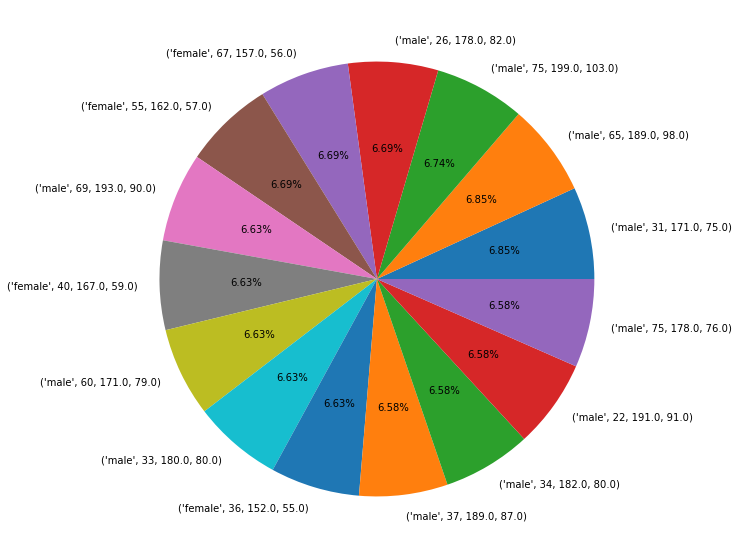

In [77]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df[:15],labels=label_df[:15],autopct="%1.2f%%")
plt.show()

In [78]:
label_df=df.groupby(['Gender','Age'])['Duration'].mean().sort_values(ascending=False).index


In [79]:
val_df=df.groupby(['Gender','Age'])['Duration'].mean().sort_values(ascending=False).values


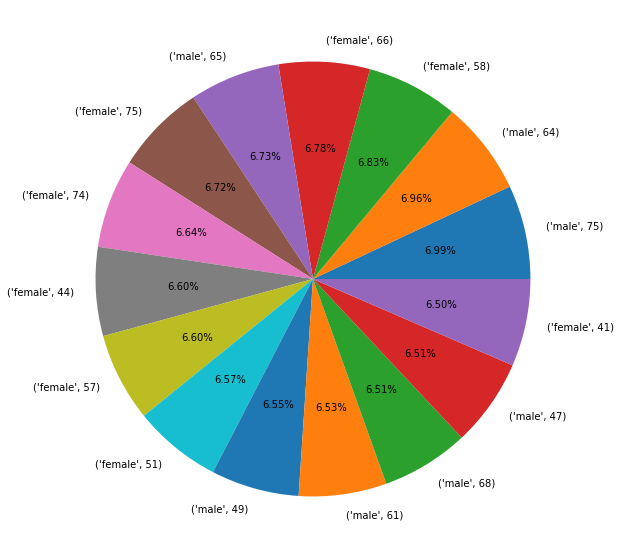

In [80]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df[:15],labels=label_df[:15],autopct="%1.2f%%")
plt.show()

In [81]:
label_df=df.groupby(['Gender','Age'])['Heart_Rate'].mean().sort_values(ascending=False).index


In [82]:
val_df=df.groupby(['Gender','Age'])['Heart_Rate'].mean().sort_values(ascending=False).values


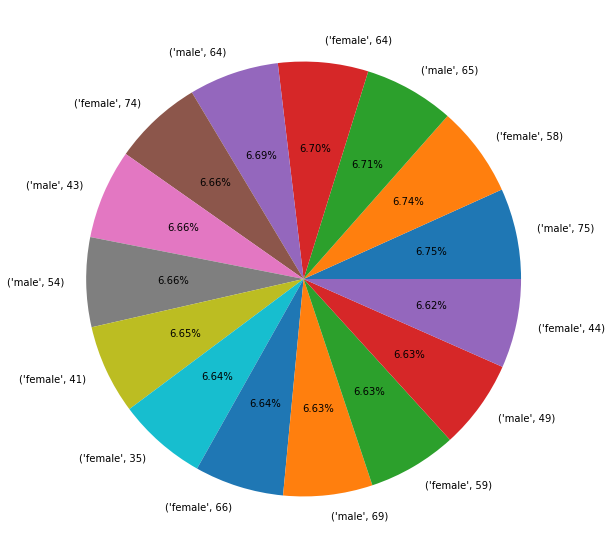

In [83]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df[:15],labels=label_df[:15],autopct="%1.2f%%")
plt.show()

In [84]:
label_df=df.groupby(['Gender','Age'])['Calories'].mean().sort_values(ascending=False).index


In [85]:
val_df=df.groupby(['Gender','Age'])['Calories'].mean().sort_values(ascending=False).values


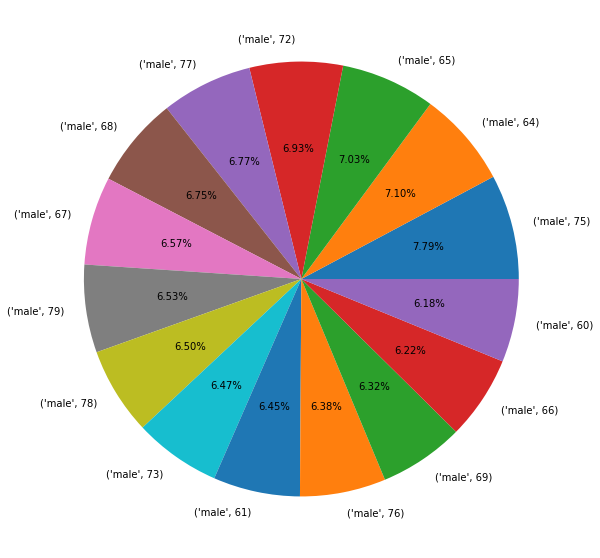

In [86]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df[:15],labels=label_df[:15],autopct="%1.2f%%")
plt.show()

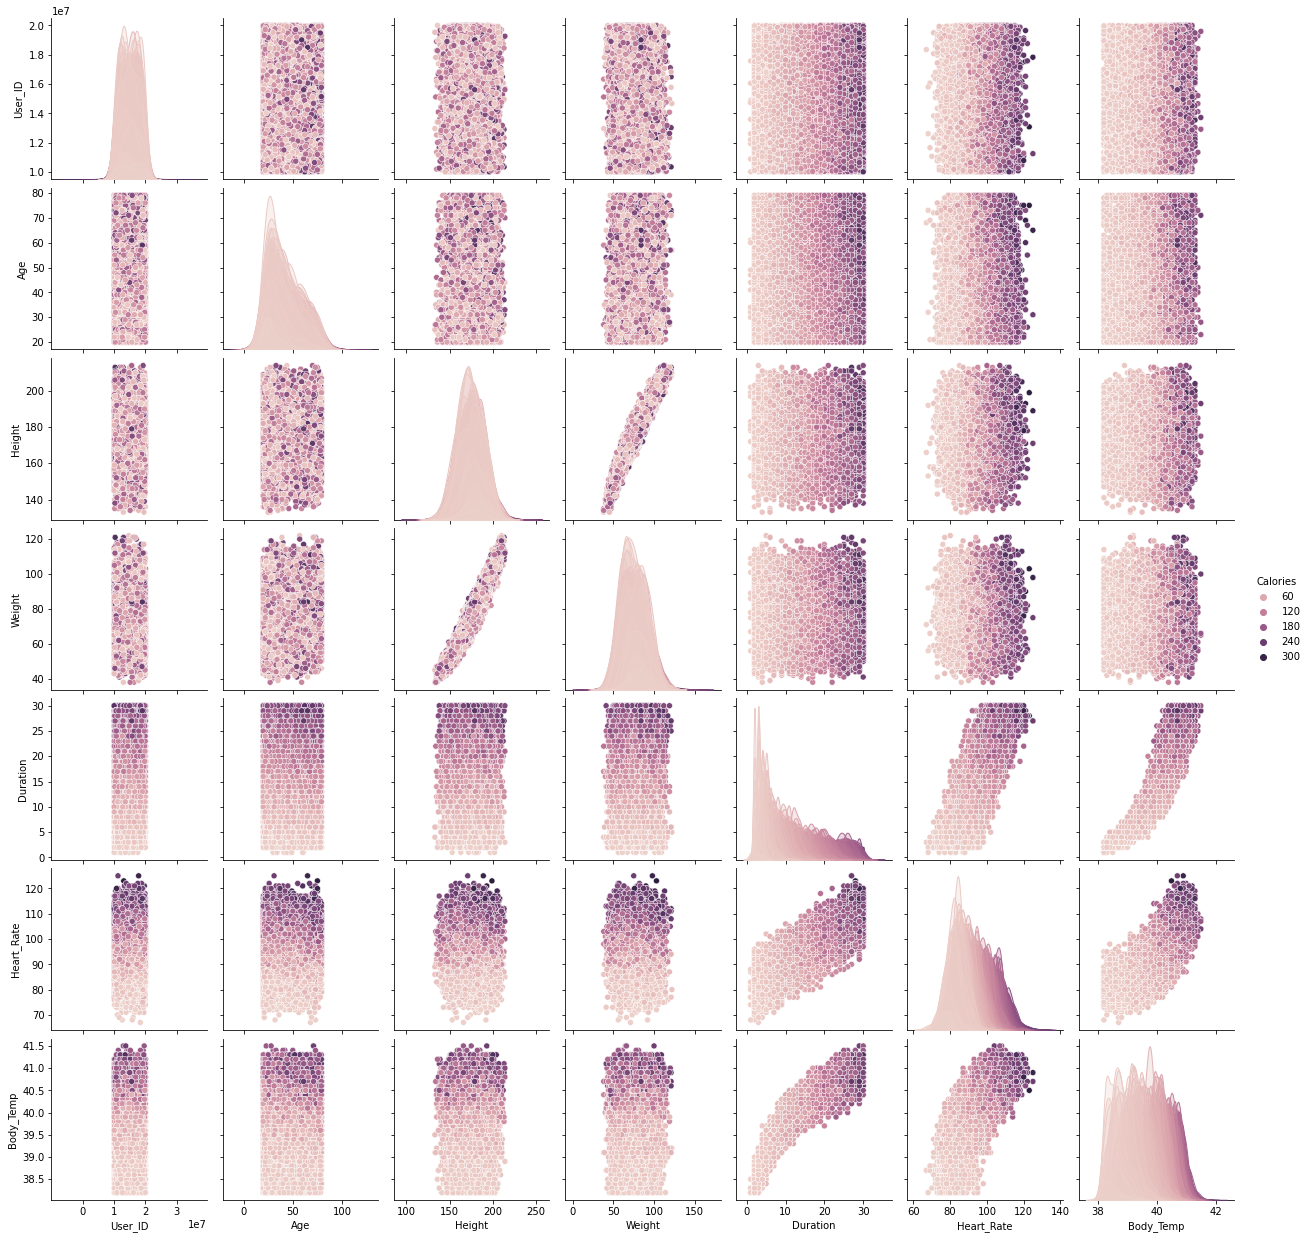

In [87]:
sns.pairplot(df,hue='Calories')

<AxesSubplot:>

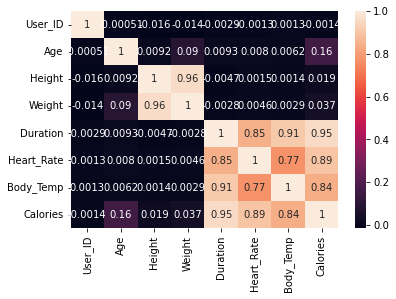

In [88]:
sns.heatmap(df.corr(),annot=True)

In [89]:
df.drop(['Heart_Rate','Height','Body_Temp'],axis=1,inplace=True)

C:\Users\himanshu\AppData\Local\Temp\ipykernel_15444\3443519999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Heart_Rate','Height','Body_Temp'],axis=1,inplace=True)


<AxesSubplot:>

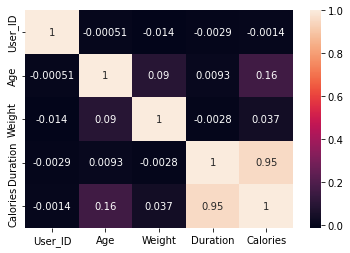

In [90]:
sns.heatmap(df.corr(),annot=True)

In [91]:
df

,User_ID,Gender,Age,Weight,Duration,Calories
0,14733363,male,68,94.0,29.0,231.0
1,14861698,female,20,60.0,14.0,66.0
2,11179863,male,69,79.0,5.0,26.0
3,16180408,female,34,71.0,13.0,71.0
4,17771927,female,27,58.0,10.0,35.0
...,...,...,...,...,...,...
14995,15644082,female,20,86.0,11.0,45.0
14996,17212577,female,27,65.0,6.0,23.0
14997,17271188,female,43,58.0,16.0,75.0
14998,18643037,male,78,97.0,2.0,11.0


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

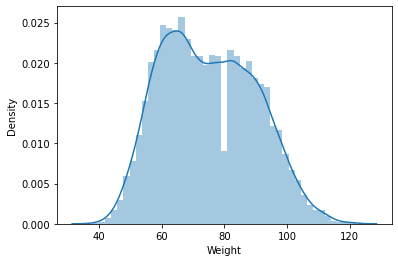

In [92]:
sns.distplot(df['Weight'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Duration', ylabel='Density'>

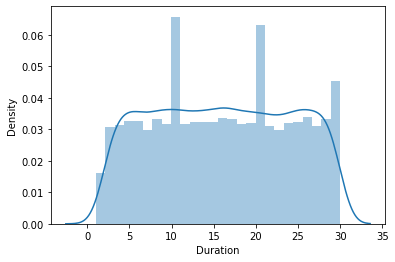

In [93]:
sns.distplot(df['Duration'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

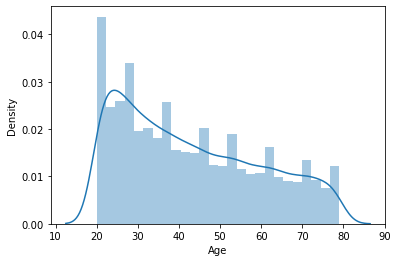

In [94]:
sns.distplot(df['Age'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='User_ID', ylabel='Density'>

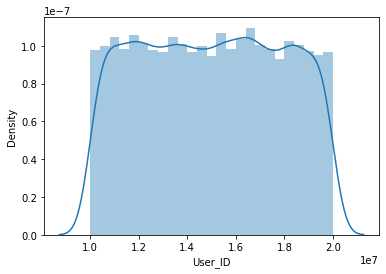

In [95]:
sns.distplot(df['User_ID'])

In [96]:
le=LabelEncoder()


In [97]:
df

,User_ID,Gender,Age,Weight,Duration,Calories
0,14733363,male,68,94.0,29.0,231.0
1,14861698,female,20,60.0,14.0,66.0
2,11179863,male,69,79.0,5.0,26.0
3,16180408,female,34,71.0,13.0,71.0
4,17771927,female,27,58.0,10.0,35.0
...,...,...,...,...,...,...
14995,15644082,female,20,86.0,11.0,45.0
14996,17212577,female,27,65.0,6.0,23.0
14997,17271188,female,43,58.0,16.0,75.0
14998,18643037,male,78,97.0,2.0,11.0


In [98]:
df['Gender']=le.fit_transform(df['Gender'])


C:\Users\himanshu\AppData\Local\Temp\ipykernel_15444\536352534.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender']=le.fit_transform(df['Gender'])


In [99]:
df

,User_ID,Gender,Age,Weight,Duration,Calories
0,14733363,1,68,94.0,29.0,231.0
1,14861698,0,20,60.0,14.0,66.0
2,11179863,1,69,79.0,5.0,26.0
3,16180408,0,34,71.0,13.0,71.0
4,17771927,0,27,58.0,10.0,35.0
...,...,...,...,...,...,...
14995,15644082,0,20,86.0,11.0,45.0
14996,17212577,0,27,65.0,6.0,23.0
14997,17271188,0,43,58.0,16.0,75.0
14998,18643037,1,78,97.0,2.0,11.0


In [100]:
sc=StandardScaler()


In [101]:
lr=LinearRegression()


In [102]:
y=df['Calories']

In [103]:
X=df.drop('Calories',axis=1)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [105]:
X_train.shape

(11618, 5)

In [106]:
X_test.shape

(2905, 5)

In [107]:
X=sc.fit_transform(X)


In [108]:
lr.fit(X_train,y_train)

LinearRegression()

In [109]:
y_pred=lr.predict(X_test)


In [110]:
r2_score(y_test,y_pred)

0.9337851501381822

In [111]:
dtr=DecisionTreeRegressor()


In [112]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [113]:
y_pred=dtr.predict(X_test)


In [114]:
r2_score(y_test,y_pred)

0.9267309616601556

In [115]:
rfr=RandomForestRegressor()


In [116]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [117]:
y_pred=rfr.predict(X_test)


In [118]:
r2_score(y_test,y_pred)

0.9592108685672229

In [119]:
xgb_i=xgb.XGBRegressor()


In [120]:
xgb_i.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [121]:
y_pred=xgb_i.predict(X_test)


In [122]:
r2_score(y_test,y_pred)

0.9613338263145355